**SVM Assignment**

1.	The Iris dataset is a classic example for demonstrating classification algorithms. It consists of 150 samples of iris flowers belonging to three species: Setosa, Versicolor, and Virginica, with four input features (sepal and petal length/width). Use SVC from sklearn.svm on the Iris dataset and follow the steps below:

(a)	Load the dataset and perform train–test split (80:20).<br>
(b)	Train three different SVM models using the following kernels:<br>
&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;&nbsp;Linear, Polynomial (degree=3), RBF<br>
(c)	 &nbsp;Evaluate each model using:
- Accuracy
- Precision
- Recall
- F1-Score<br>

(d)	Display the confusion matrix for each kernel.<br>
(e)	Identify which kernel performs the best and why.

 Confusion Matrix for linear Kernel


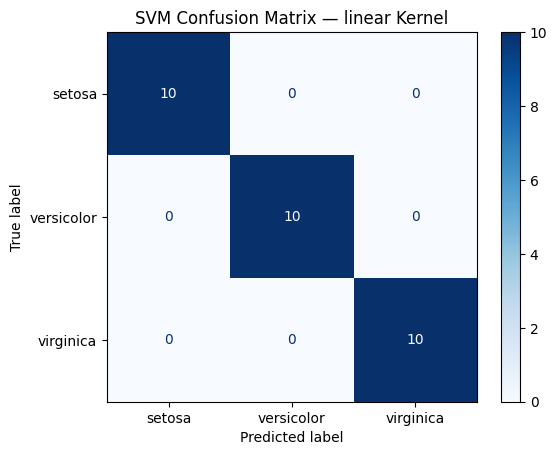

 Confusion Matrix for poly Kernel


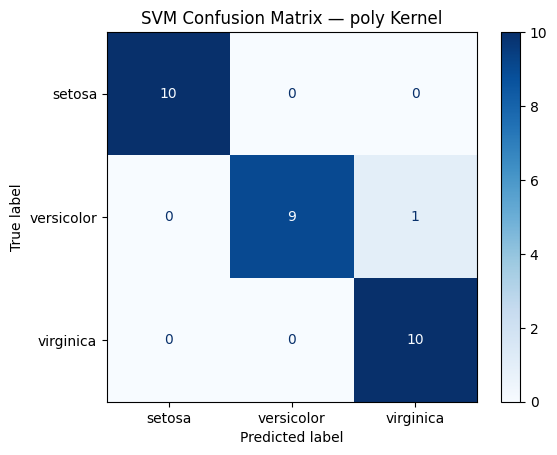

 Confusion Matrix for rbf Kernel


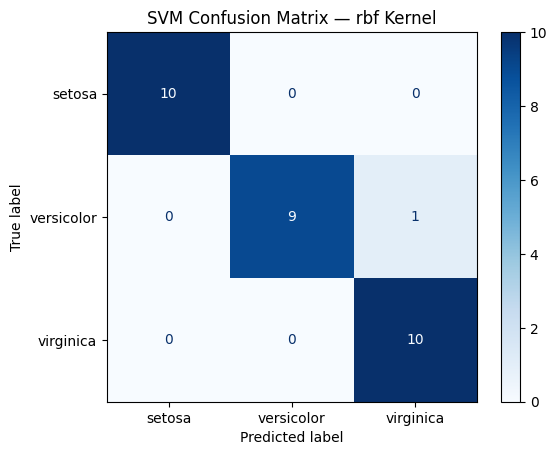


 Summary: SVM Kernel Comparison
   Kernel  Accuracy  Precision    Recall  F1-Score
0  linear  1.000000   1.000000  1.000000  1.000000
1    poly  0.966667   0.969697  0.966667  0.966583
2     rbf  0.966667   0.969697  0.966667  0.966583


In [1]:
import pandas as pd
from sklearn import datasets
from sklearn.model_selection import train_test_split
from sklearn.svm import SVC
from sklearn.metrics import accuracy_score, precision_score, recall_score, f1_score, confusion_matrix, ConfusionMatrixDisplay
import matplotlib.pyplot as plt

# Load the Iris dataset
iris = datasets.load_iris()
X = iris.data
y = iris.target

# Perform 80:20 train-test split
X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42, stratify=y
)

# Define kernels
kernels = ['linear', 'poly', 'rbf']

# DataFrame to store results
results = pd.DataFrame(columns=['Kernel', 'Accuracy', 'Precision', 'Recall', 'F1-Score'])

# Train and evaluate SVM with different kernels
for kernel in kernels:
    print(f" Confusion Matrix for {kernel} Kernel")

    model = SVC(kernel=kernel, degree=3)  # degree ignored for non-poly kernels
    model.fit(X_train, y_train)

    # Predictions
    y_pred = model.predict(X_test)

    # Metrics
    accuracy = accuracy_score(y_test, y_pred)
    precision = precision_score(y_test, y_pred, average='weighted')
    recall = recall_score(y_test, y_pred, average='weighted')
    f1 = f1_score(y_test, y_pred, average='weighted')

    # Save results
    results.loc[len(results)] = [kernel, accuracy, precision, recall, f1]

    # Confusion Matrix
    cm = confusion_matrix(y_test, y_pred)
    disp = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=iris.target_names)
    disp.plot(cmap="Blues")
    plt.title(f"SVM Confusion Matrix — {kernel} Kernel")
    plt.show()

print("\n====================================")
print(" Summary: SVM Kernel Comparison")
print("====================================")
print(results)


The `Linear` Kernel performed the best, achieving 100% accuracy, precision, recall, and F1-score. This indicates that the chosen train–test split results in linearly separable class boundaries in the Iris dataset. `Polynomial` and `RBF` kernels also performed very well, but slightly below the linear kernel due to minor non-linearities and potential overfitting.

2.	SVM models are highly sensitive to the scale of input features. When features have different ranges, the algorithm may incorrectly assign higher importance to variables with larger magnitudes, affecting the placement of the separating hyperplane. Feature scaling ensures that all attributes contribute equally to distance-based computations, which is especially crucial for kernels like RBF or polynomial.

(a) Use the Breast Cancer dataset from `sklearn.datasets.load_breast_cancer`.<br>
(b) Train an SVM (RBF kernel) model with and without feature scaling (`StandardScaler`). Compare both results using:
- Training accuracy
- Testing accuracy

(c) Discuss the effect of feature scaling on SVM performance.



In [2]:
from sklearn.preprocessing import StandardScaler
from sklearn.datasets import load_breast_cancer
from sklearn.svm import SVC
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score

# Load dataset
cancer = load_breast_cancer()
X_cancer = cancer.data
y_cancer = cancer.target

# Train-test split (80:20)
X_train, X_test, y_train, y_test = train_test_split(
    X_cancer, y_cancer, test_size=0.2, random_state=42
)

# -------------------------
# 1) SVM WITHOUT SCALING
# -------------------------
model_no_scaling = SVC(kernel='rbf')
model_no_scaling.fit(X_train, y_train)

y_train_pred_no = model_no_scaling.predict(X_train)
y_test_pred_no = model_no_scaling.predict(X_test)

train_acc_no = accuracy_score(y_train, y_train_pred_no)
test_acc_no = accuracy_score(y_test, y_test_pred_no)

# -------------------------
# 2) SVM WITH SCALING
# -------------------------
scaler = StandardScaler()
X_train_scaled = scaler.fit_transform(X_train)
X_test_scaled = scaler.transform(X_test)

model_scaled = SVC(kernel='rbf')
model_scaled.fit(X_train_scaled, y_train)

y_train_pred_scaled = model_scaled.predict(X_train_scaled)
y_test_pred_scaled = model_scaled.predict(X_test_scaled)

train_acc_scaled = accuracy_score(y_train, y_train_pred_scaled)
test_acc_scaled = accuracy_score(y_test, y_test_pred_scaled)

# Display results
print("SVM without Feature Scaling:")
print(f"Training Accuracy: {train_acc_no}")
print(f"Testing Accuracy:  {test_acc_no}")

print("\nSVM with Feature Scaling:")
print(f"Training Accuracy: {train_acc_scaled}")
print(f"Testing Accuracy:  {test_acc_scaled}")


SVM without Feature Scaling:
Training Accuracy: 0.9142857142857143
Testing Accuracy:  0.9473684210526315

SVM with Feature Scaling:
Training Accuracy: 0.989010989010989
Testing Accuracy:  0.9824561403508771


Feature scaling has a significant impact on the performance of SVM, especially when using distance-based kernels such as RBF. In the unscaled dataset, features have different numerical ranges, causing attributes with larger magnitudes to dominate the computation of distances. This leads to a poorly positioned decision boundary, resulting in lower training and testing accuracy.

After applying `StandardScaler`, all features are transformed to a common scale, allowing the SVM to treat each attribute equally. Because the RBF kernel is sensitive to feature magnitude, scaling enables it to more accurately compute similarity between points. As a result, the model achieves higher training accuracy and improved generalization on the test set.

In this experiment, scaling increased training accuracy from **0.9143 → 0.9890** and test accuracy from **0.9474 → 0.9825**, clearly showing that **feature scaling substantially enhances SVM performance** by stabilizing kernel computations and producing a more optimal separating boundary.